# Аналитика в авиакомпании

Авиакомпания F9 выполняет внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

На основании выполненных ранее запросов к СУБД провести аналитику полученых датасетов.

## 1 Импорт датасетов и общая информация по ним

In [1]:
# импортируем необходимые библиотеки и задаем первоначальные параметры
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

%matplotlib inline
sns.set()

Загружаем датасеты, сохраняем в отдельные переменные и смотрим общую информацию:

**Результат первого запроса**

In [2]:
query_1 = pd.read_csv('datasets/query_1.csv')
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**Результат третьего запроса**

In [4]:
query_3 = pd.read_csv('datasets/query_3.csv')
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Результат последнего запроса**

In [6]:
query_last = pd.read_csv('datasets/query_last.csv')
query_last.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [7]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


### Выводы:

1. Данные загружены корректно, пропуски есть только в результате последнего запроса из-за использования LEFT JOIN в запросе.
2. При обработке пропусков в query_last можно будет изменить тип данных в festival_week последнего запроса на целочисленный.

## 2 Графики и диаграммы

### 2.1 Выбор топ-10 городов по количеству рейсов

Отобразим топ-10 городов по количеству рейсов на столбиковой диаграмме. Определим функцию, которой воспользуемся в дальнейшем:

In [8]:
def bar_func(first, second, data, title, label_x_name='', figsize=(14, 8)):
    plt.figure(figsize=figsize)
    plt.title(title, pad=15, fontsize = 20)
    ax = sns.barplot(x=first, y=second, data=data)
    plt.ylabel('')
    plt.xlabel(label_x_name, labelpad=10, fontsize=15);

Отсортируем данные по среднему количеству полетов и сохраним в отдельную переменную топ-10 городов по количеству рейсов в день:

In [9]:
top_10 = query_3.sort_values(by='average_flights', ascending=False).reset_index(drop=True)[:10]

In [10]:
top_10.head()

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581


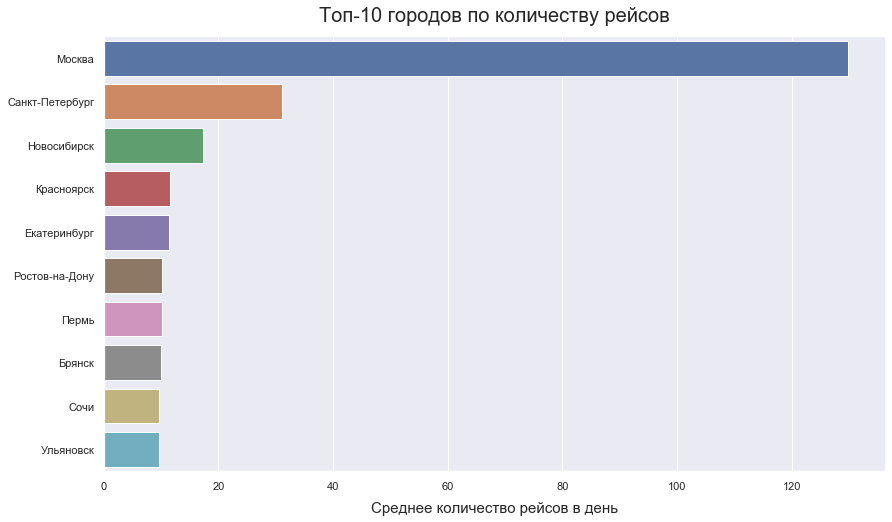

In [11]:
bar_func('average_flights', 'city', 
         data=top_10, 
         label_x_name='Среднее количество рейсов в день', 
         title='Топ-10 городов по количеству рейсов')

**Вывод:** Самые загруженные - аэропорты Москвы, но их больше, чем в других городах (3 крупных) и терминалов у них больше, следовательно принимать количество самолетов они могут значительно больше. Большую часть этих городов составляют города миллионники: Москва,Санкт-Петербург,Новосибирск,Екатеринбург,Ростов-на-Дону,Пермь,Красноярск. Так как информация о перелетах собрана за сентябрь, то в лидеры попадает курортный город Сочи.

### 2.2 График зависимости модели самолета и количества рейсов

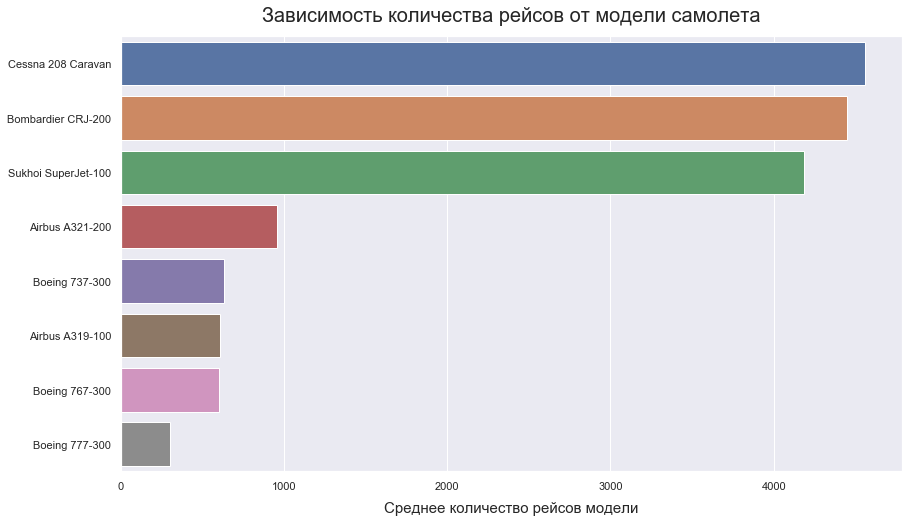

In [12]:
bar_func('flights_amount', 'model', 
         data=query_1.sort_values(by='flights_amount', ascending=False), 
         label_x_name='Среднее количество рейсов модели', 
         title='Зависимость количества рейсов от модели самолета')

**Вывод:** Судя по графику можно предположить, что компания F9 использует в основном отечественные пассажирские самолеты для дальних перелетов (Superjet) и небольшие самолеты для региональных перелетов (Cessna и Bombardier). Airbus и Boeing не пользуются большой популярностью в компании.

### 2.3 Зависимость количества рейсов от города 

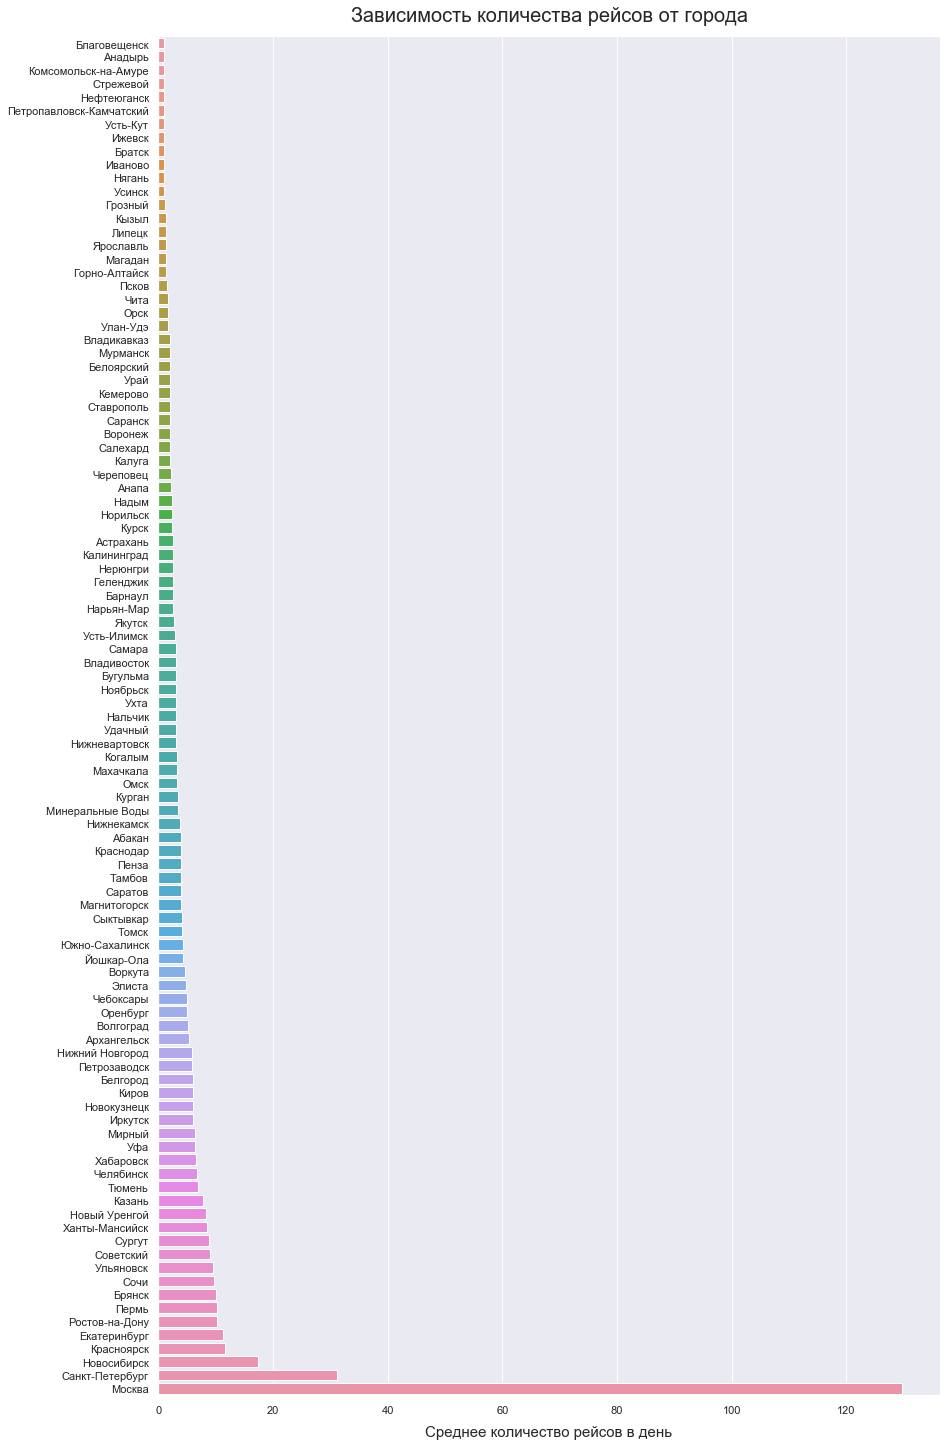

In [13]:
bar_func('average_flights', 'city', 
         data=query_3.sort_values(by='average_flights', ascending=True), 
         label_x_name='Среднее количество рейсов в день', 
         title='Зависимость количества рейсов от города', 
         figsize=(14, 25))

### Вывод:

В принципе, вывод такой же, как и в 2.1. Можно отметить, что западные города России расположены не так далеко от границ со многими странами => и вариантов перелетов больше.

# 3. Формулирование H0 и H1 гипотез и подтвержедние одной из них

**Нулевая гипотеза:** Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

**Альтернативная гипотеза:** Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

Посмотрим на значения спроса на билеты во время фестивалей:

In [14]:
sample_1 = query_last['ticket_amount'][~query_last['festival_name'].isnull()]
sample_1

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

Теперь поглядим на спрос, когда нет фестивалей:

In [15]:
sample_2 = query_last['ticket_amount'][query_last['festival_name'].isnull()]
sample_2

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

На первый взгляд, из-за значения спроса в 43568 билетов во время Park Live, средние отличаются значительно. Выберем значение уровня значимости, с которым будем сравнивать расчитанный уровень и определим функцию для проверки гипотезы.

In [16]:
# выберем критический уровень статистической значимости - если p-value окажется меньше него, то отвергнем нулевую гипотезу
alpha = .05

# определим функцию для проверки гипотезы
def calc_h0(samp_1, samp_2, alpha=alpha):
    print('*' * 40)
    print(f'Выбранное значение alpha - {alpha}')
    
    # так как мы имеем 2 зависимые совокупности - воспользуемся Т-критерием для 
    # двух независимых выборок (ttest_ind библиотеки scypy.stats)
    result = st.ttest_ind(sample_1, sample_2)
    print(f'Рассчитанное значение p-value - {result.pvalue}')
    
    if (result.pvalue) < alpha:
        print('Принимаем альтернативную гипотезу, отвергаем нулевую')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    print('*' * 40)

Произведем расчет для полученных в результате запроса выборок:

In [17]:
calc_h0(sample_1, sample_2)

****************************************
Выбранное значение alpha - 0.05
Рассчитанное значение p-value - 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу
****************************************


### Вывод:

Выбранный уровень значимости (0.05) проверки гипотезы не позволяет отвергнуть нулевую гипотезу и можно говорить о том, что средний спрос на билеты во время фестивалей скорее всего не отличается от среднего спроса на билеты в обычное время.